In [1]:
import pymysql
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
prod_conn = pymysql.connect(
  host='localhost',
  user='root',
  password='Mike4568!',
  port=3306,
  database='FORMULA1')
with prod_conn:
    cur = prod_conn.cursor()

In [3]:
data = pd.read_csv('./data/For_models.csv')

In [76]:
cur.execute("""
            SELECT name
            FROM circuits
            where circuit_id = 1
            
            



""")

1

In [75]:
cur.description

(('circuit_id', 3, None, 11, 11, 0, False),
 ('circuit_ref', 253, None, 120, 120, 0, False),
 ('name', 253, None, 180, 180, 0, False),
 ('location', 253, None, 120, 120, 0, False),
 ('county', 253, None, 120, 120, 0, False),
 ('lat', 246, None, 12, 12, 6, False),
 ('lng', 246, None, 12, 12, 6, False),
 ('url', 253, None, 600, 600, 0, True))

In [77]:
cur.fetchall()

(('Albert Park Grand Prix Circuit',),)

In [8]:
data.drop(columns=['Unnamed: 0'], inplace = True)

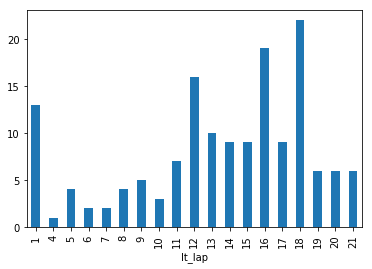

In [46]:
# frequency of pitstops per lap
data[(data.target == True) & (data.circuitId == 1) & (data.lt_lap < 22)].groupby('lt_lap')['target'].sum().plot(kind = 'bar')

In [55]:
data[(data.circuitId == 1) & (data.lt_lap < 22)]

,raceId,driverId,lt_lap,position,milliseconds,circuitId,date,ps_lap,pit_time,target,up_milli
0,841,153,1,21,133879,1,2011,1.0,26898.0,True,133879
1,841,30,1,22,161428,1,2011,1.0,25021.0,True,161428
2,841,17,11,7,114995,1,2011,11.0,23426.0,True,95248
3,841,4,12,12,112624,1,2011,12.0,23251.0,True,95857
4,841,13,13,11,114060,1,2011,13.0,23842.0,True,95662
...,...,...,...,...,...,...,...,...,...,...,...
450055,1010,817,17,18,91569,1,2019,NaN,NaN,False,91569
450056,1010,817,18,18,89848,1,2019,NaN,NaN,False,89848
450057,1010,817,19,18,90027,1,2019,NaN,NaN,False,90027
450058,1010,817,20,18,89921,1,2019,NaN,NaN,False,89921


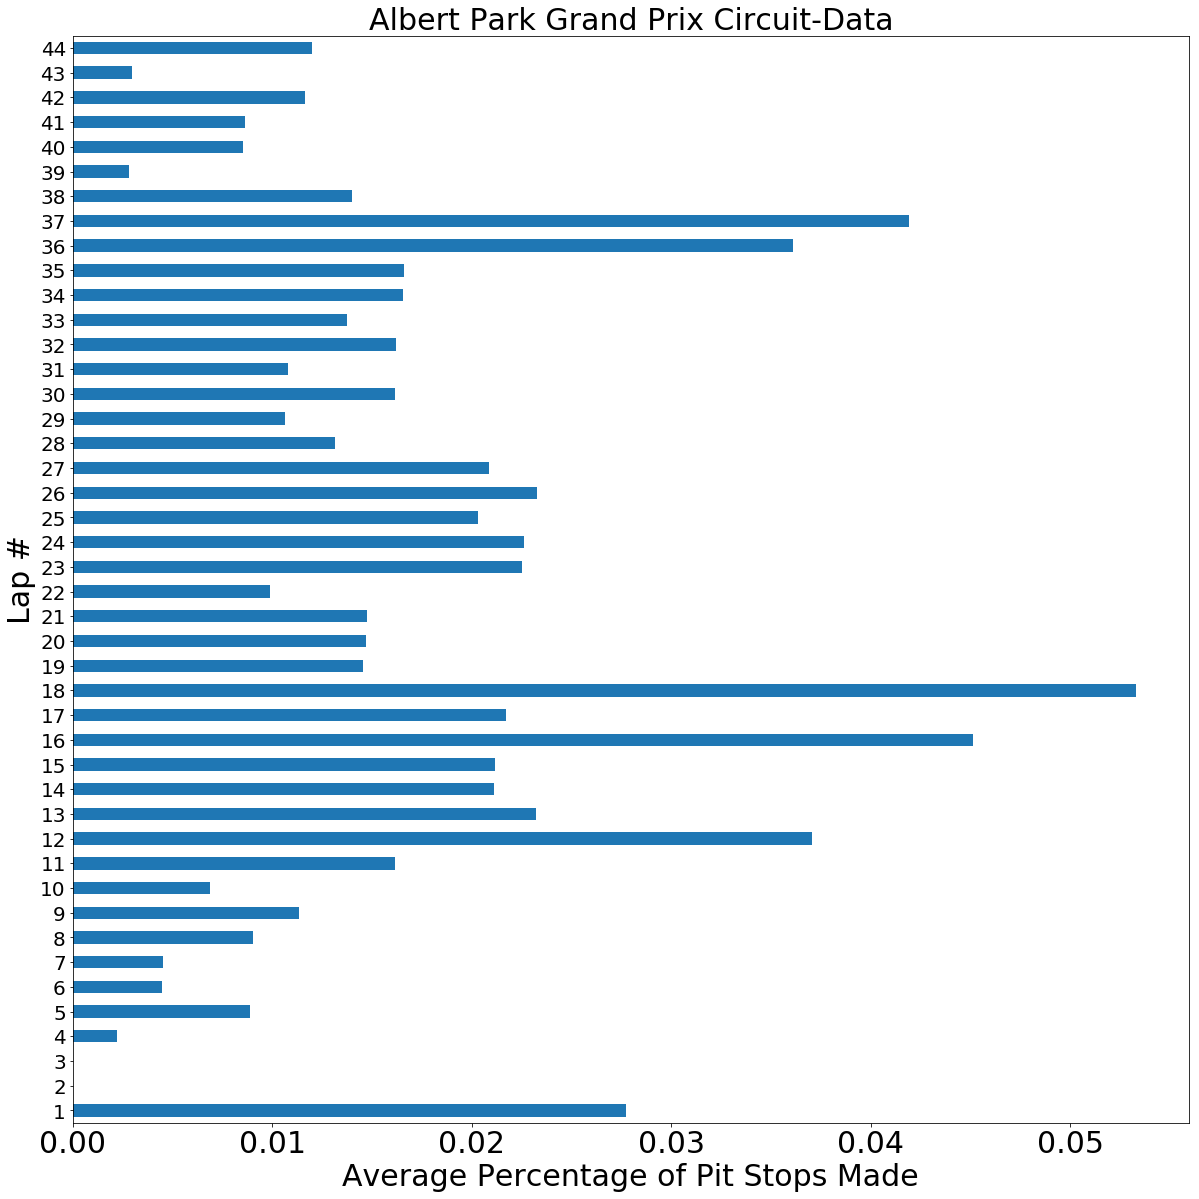

In [87]:
plt.figure(figsize = (20,20));
data[(data.circuitId == 1) & (data.lt_lap<45)].groupby('lt_lap')['target'].mean().plot(kind = 'barh')
plt.title('Albert Park Grand Prix Circuit-Data', size = 30);
plt.ylabel('Lap #', size = 30);
plt.xlabel('Average Percentage of Pit Stops Made', size = 30);
plt.xticks(size = 30);
plt.yticks(size = 20);

In [20]:
data[(data.target == True) & (data.circuitId == 1) & (data.lt_lap < 22)].groupby('lt_lap')['']

,raceId,driverId,lt_lap,position,milliseconds,circuitId,date,ps_lap,pit_time,target,up_milli
0,841,153,1,21,133879,1,2011,1.0,26898.0,True,133879
1,841,30,1,22,161428,1,2011,1.0,25021.0,True,161428
2,841,17,11,7,114995,1,2011,11.0,23426.0,True,95248
3,841,4,12,12,112624,1,2011,12.0,23251.0,True,95857
4,841,13,13,11,114060,1,2011,13.0,23842.0,True,95662
...,...,...,...,...,...,...,...,...,...,...,...
447219,1010,825,14,11,108686,1,2019,14.0,22388.0,True,91388
447220,1010,848,14,15,108191,1,2019,14.0,21780.0,True,91782
447221,1010,1,15,4,106079,1,2019,15.0,21515.0,True,89495
447222,1010,154,15,14,116519,1,2019,15.0,29981.0,True,91555


In [80]:
predict = pd.read_csv("./data/pred__.csv")

In [82]:
predict.drop(columns=['Unnamed: 0'],inplace=True)

In [83]:
predict.head()

,lt_lap,position,up_milli,circuitId,date,0
0,61,2,76107,7,2017,False
1,1,9,84509,23,2002,False
2,52,2,110041,15,2015,False
3,32,8,101584,9,1998,False
4,48,13,103187,2,2003,False


In [90]:
predict.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155927 entries, 0 to 155926
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   lt_lap     155927 non-null  int64
 1   position   155927 non-null  int64
 2   up_milli   155927 non-null  int64
 3   circuitId  155927 non-null  int64
 4   date       155927 non-null  int64
 5   0          155927 non-null  bool 
dtypes: bool(1), int64(5)
memory usage: 6.1 MB


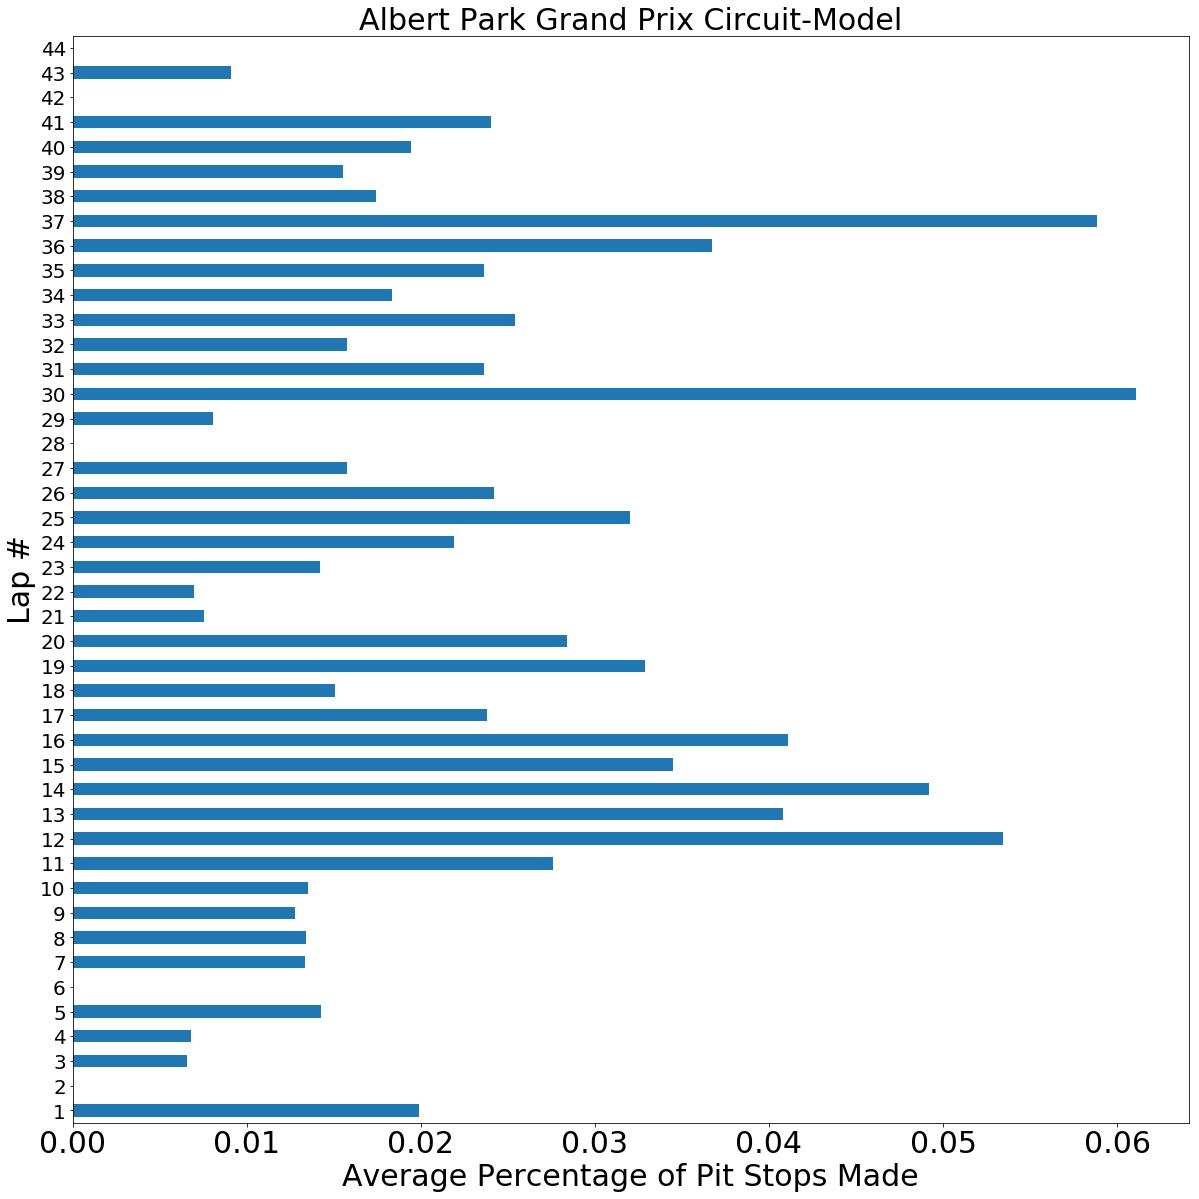

In [99]:
plt.figure(figsize = (20,20));
predict[(predict.circuitId == 1) & (predict.lt_lap<45)].groupby('lt_lap')['0'].mean().plot(kind = 'barh')
plt.title('Albert Park Grand Prix Circuit-Model', size = 30);
plt.ylabel('Lap #', size = 30);
plt.xlabel('Average Percentage of Pit Stops Made', size = 30);
plt.xticks(size = 30);
plt.yticks(size = 20);